# Deep Learning Course - LAB 1

## Intro to PyTorch

PyTorch (PT) is a Python (and C++) library for Machine Learning (ML) particularly suited for Neural Networks and their applications.

Its great selection of built-in modules, models, functions, CUDA capability, tensor arithmetic support and automatic differentiation functionality make it one of the most used scientific libraries for Deep Learning.

Note: for this series of labs, we advise to install Python >= 3.7

### Installing PyTorch

We advise to install PyTorch following the directions given in its [home page](https://pytorch.org/get-started/locally/). Just typing `pip install torch` may not be the correct action as you have to take into account the compatibility with `cuda`. If you have `cuda` installed, you can find your version by typing `nvcc --version` in a terminal (Linux/iOS). 

If you're using Windows, we first suggest first to install Anaconda and then install PyTorch from the `anaconda prompt` software via `conda` (preferably) or `pip`.

If you're using Google Colab, all the libraries needed to follow this lecture should be pre-installed there.

We see now how to operate on Colab.

### For Colab users

Google Colab is a handy tool that we suggest you use for this course---especially if your laptop does not support CUDA or has limited hardware capabilities. Anyway, note that **we'll try to avoid GPU code as much as possible**.

Essentially, Colab renders available to you a virtual machine with a limited hardware capability and disk where you can execute your code inside a given time window. You can even ask for a GPU (if you use it too much you'll need to start waiting a lot before it's available though).

#### Your (maybe) first Colab commands

Colab Jupyter-style notebook interface with a few tweaks.

For instance, you may run (some) bash command from here prepending `!` to your code.

In [1]:
!ls

01-intro-to-pt.ipynb  02-sgd-training.ipynb  data  img	scripts


In [2]:
!pwd

/home/angela/Documenti/Deep Learning/DSSC_DL_2021/labs


In [3]:
!git clone https://github.com/mnzluca/IntroToAI

Cloning into 'IntroToAI'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 105 (delta 13), reused 26 (delta 5), pack-reused 66
Ricezione degli oggetti: 100% (105/105), 51.55 MiB | 2.74 MiB/s, done.
Risoluzione dei delta: 100% (32/32), done.


This makes it very easy to operate your virtual machine without the need for a terminal. 

#### File transfer on Colab

One of the most intricate action in Colab is file transfer. Since your files reside on the virtual machine, there're two main ways to operate file transfer on Colab.

* `files.download()` / `.upload()`

In [4]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
files.download("sample_data/README.md")

Although it may be much more handy to connect your Google Drive to Colab. Here is a snippet that lets you do this.

In [ ]:
from google.colab import drive

folder_mount = '/content/drive' # Your Drive will be mounted on top of this path

drive.mount(folder_mount)

### Dive into PyTorch - connections with NumPy

Like NumPy, PyTorch provides its own multidimensional array class, called `Tensor`. `Tensor`s are essentially the equivalent of NumPy `ndarray`s.
If we wish to operate a very superficial comparison between `Tensor` and `ndarray`, we can say that:
* `Tensor` draws a lot of methods from NumPy, although it's missing some (see [this GitHub issue](if you're interested))
* `Tensor` is more OO than `ndarray` and solves some inconsistencies within NumPy
* `Tensor` has CUDA support

In [1]:
import torch
import numpy as np

# create custom Tensor and ndarray
x = torch.Tensor([[1,5,4],[3,2,1]])
y = np.array([[1,5,4],[3,2,1]])

def pretty_print(obj, title=None):
    if title is not None:
        print(title)
    print(obj)
    print("\n")

pretty_print(x, "x")
pretty_print(y, "y")

x
tensor([[1., 5., 4.],
        [3., 2., 1.]])


y
[[1 5 4]
 [3 2 1]]




What are the types of these objs?

In [2]:
x.dtype, y.dtype

(torch.float32, dtype('int64'))

`torch` already thinks with Machine Learning in mind as the `Tensor` is implicitly converted to `dtype float32`, while NumPy makes no such assumption.

For more info on `Tensor` data types, please check the beginning of [this page](https://pytorch.org/docs/stable/tensors.html).

As in NumPy, we can call the `.shape` attribute to get the shape of the structures. Moreover, `Tensor`s have also the `.size()` method which is analogous to `.shape`.

In [3]:
x.shape, y.shape, x.size()

(torch.Size([2, 3]), (2, 3), torch.Size([2, 3]))

Notice how a `Tensor` shape is **not** a tuple.

We can also create a random `Tensor` analogously to NumPy.

A `2 × 3 × 3` `Tensor` is the same as saying "2 3 × 3 matrices", or a "cubic matrix"

![](img/tensors.jpg)

In [4]:
x = torch.rand([2, 3, 3]) # you always have to specify wih a tuple the shape of the tensor!
x

tensor([[[0.9280, 0.1340, 0.9581],
         [0.5027, 0.0477, 0.2049],
         [0.5473, 0.4035, 0.7573]],

        [[0.3744, 0.4266, 0.2842],
         [0.1188, 0.2153, 0.7267],
         [0.9205, 0.8184, 0.7448]]])

In [5]:
y = np.random.rand(2, 3, 3)
y

array([[[0.34989447, 0.36597144, 0.50542438],
        [0.56567929, 0.01843964, 0.18805826],
        [0.02664252, 0.45189365, 0.09091822]],

       [[0.07951707, 0.78401585, 0.06974925],
        [0.03458609, 0.69625923, 0.37263207],
        [0.97624707, 0.95133144, 0.28856876]]])

We can get the total number of elements in a `Tensor` via the `numel()` method

In [6]:
x.numel()

18

We can get the memory occupied by each element of a `Tensor` via `element_size()`

In [7]:
x.element_size()

4

Hence, we can quickly calculate the size of the `Tensor` within the RAM

In [8]:
x.numel() * x.element_size()

72

#### Slicing a `Tensor`

You can slice a `Tensor` (*i.e.*, extract a substructure of a `Tensor`) as in NumPy using the square brackets:

In [9]:
# extract first element (i.e., matrix) of first dimension
pretty_print(x[0], "Slice first element (x[0])")

# extract a specific element
pretty_print(x[1,2,0], "Slice element at (1, 2, 0) (x[1, 2, 0])")

# extract first element of second dimension (":" means all the elements of the given dim)
pretty_print(x[:, 0], "Slice first element of second dim (x[:, 0])")

# note that it is equivalent to
pretty_print(x[:, 0, :], "As above (x[:, 0] equivalent to x[:, 0, :])")

# extract range of dimensions (first and second element of third dim) 
pretty_print(x[:, :, 0:2], "Slice first and second el of third dim (x[:, :, 0:2])")

# note that it is equivalent to (i.e., you can also pass list for slicing, as opposed to Py vanilla lists/tuples)
pretty_print(x[:, :, (0, 1)], "As above (x[:, :, 0:2] equivalent to x[:, :, (0, 1)])")

Slice first element (x[0])
tensor([[0.9280, 0.1340, 0.9581],
        [0.5027, 0.0477, 0.2049],
        [0.5473, 0.4035, 0.7573]])


Slice element at (1, 2, 0) (x[1, 2, 0])
tensor(0.9205)


Slice first element of second dim (x[:, 0])
tensor([[0.9280, 0.1340, 0.9581],
        [0.3744, 0.4266, 0.2842]])


As above (x[:, 0] equivalent to x[:, 0, :])
tensor([[0.9280, 0.1340, 0.9581],
        [0.3744, 0.4266, 0.2842]])


Slice first and second el of third dim (x[:, :, 0:2])
tensor([[[0.9280, 0.1340],
         [0.5027, 0.0477],
         [0.5473, 0.4035]],

        [[0.3744, 0.4266],
         [0.1188, 0.2153],
         [0.9205, 0.8184]]])


As above (x[:, :, 0:2] equivalent to x[:, :, (0, 1)])
tensor([[[0.9280, 0.1340],
         [0.5027, 0.0477],
         [0.5473, 0.4035]],

        [[0.3744, 0.4266],
         [0.1188, 0.2153],
         [0.9205, 0.8184]]])




In Py, you can also slice any list by interval via the "double colon" notation `::` (`from`:`to - 1`:`step`). Note that `::3` means "take all elements of the object by step of 3 starting from 0 until the list ends".

In [10]:
torch.range(0, 10)[0:7:3]

/home/angela/Documenti/Deep Learning/DSSC_DL_2021/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """Entry point for launching an IPython kernel.


tensor([0., 3., 6.])

#### `Tensor` supports linear algebra

In [11]:
z1 = torch.rand([4, 5])
print("z1")
print("shape", z1.shape)
print(z1)

# transposition
z2 = z1.T # specific for matrices
# z2 = z1.transpose(INDICATE DIMENSIONS!)

print("\nz2")
print("shape", z2.shape)
print(z2)

z1
shape torch.Size([4, 5])
tensor([[0.1633, 0.9493, 0.2605, 0.9819, 0.8829],
        [0.9943, 0.2070, 0.0618, 0.7593, 0.7828],
        [0.2211, 0.1903, 0.1790, 0.0591, 0.6795],
        [0.8308, 0.2549, 0.1791, 0.5185, 0.3801]])

z2
shape torch.Size([5, 4])
tensor([[0.1633, 0.9943, 0.2211, 0.8308],
        [0.9493, 0.2070, 0.1903, 0.2549],
        [0.2605, 0.0618, 0.1790, 0.1791],
        [0.9819, 0.7593, 0.0591, 0.5185],
        [0.8829, 0.7828, 0.6795, 0.3801]])


In [12]:
# matrix multiplication
pretty_print(z1 @ z2, "Matrix multiplication: with '@'")

# equivalent to
pretty_print(torch.matmul(z1, z2), "Matrix multiplication: with torch.matmul")

# and also
pretty_print(z1.matmul(z2), "Matrix multiplication: with Tensor.matmul")

Matrix multiplication: with '@'
tensor([[2.7394, 1.8117, 0.9213, 1.2690],
        [1.8117, 2.2246, 0.8470, 1.5811],
        [0.9213, 0.8470, 0.5823, 0.5531],
        [1.2690, 1.5811, 0.5531, 1.2006]])


Matrix multiplication: with torch.matmul
tensor([[2.7394, 1.8117, 0.9213, 1.2690],
        [1.8117, 2.2246, 0.8470, 1.5811],
        [0.9213, 0.8470, 0.5823, 0.5531],
        [1.2690, 1.5811, 0.5531, 1.2006]])


Matrix multiplication: with Tensor.matmul
tensor([[2.7394, 1.8117, 0.9213, 1.2690],
        [1.8117, 2.2246, 0.8470, 1.5811],
        [0.9213, 0.8470, 0.5823, 0.5531],
        [1.2690, 1.5811, 0.5531, 1.2006]])




Note that `@` identifies the matrix product.

Don't mistake `@` and `*` as the latter is the Hadamard (element-by-element) product!

In [13]:
z1 * z2 # this gives an Exception

RuntimeError: The size of tensor a (5) must match the size of tensor b (4) at non-singleton dimension 1

In [ ]:
z1 * z1

Generally, the "regular" arithmetic operators for Python act as element-wise operators in `Tensor`s (as in `ndarrays`)

In [ ]:
z1 ** 2 # Equivalent to above: NOT matrix product!

In [14]:
z3 = torch.Tensor([[1,2,3,4,7],[0.2,2,4,5,3],[-1,3,-4,2,2],[1,1,1,1,2]])
pretty_print(z1 % z3, "z1 % z3 (remainder of integer division)")
pretty_print(z3 // z1, "z3 // z1 (integer division)") # integer division
z3 /= z1
pretty_print(z3, "in-place tensor division (z3 /= z1)")

z1 % z3 (remainder of integer division)
tensor([[ 0.1633,  0.9493,  0.2605,  0.9819,  0.8829],
        [ 0.1943,  0.2070,  0.0618,  0.7593,  0.7828],
        [-0.7789,  0.1903, -3.8210,  0.0591,  0.6795],
        [ 0.8308,  0.2549,  0.1791,  0.5185,  0.3801]])


z3 // z1 (integer division)
tensor([[  6.,   2.,  11.,   4.,   7.],
        [  0.,   9.,  64.,   6.,   3.],
        [ -4.,  15., -22.,  33.,   2.],
        [  1.,   3.,   5.,   1.,   5.]])


in-place tensor division (z3 /= z1)
tensor([[  6.1221,   2.1069,  11.5167,   4.0735,   7.9282],
        [  0.2011,   9.6635,  64.7660,   6.5849,   3.8323],
        [ -4.5234,  15.7683, -22.3462,  33.8675,   2.9433],
        [  1.2036,   3.9235,   5.5823,   1.9287,   5.2619]])




As for `ndarrays`, `Tensor`s arithmetic operations support **broadcasting**. Roughly speaking, when two `Tensor`s have different shapes and a binary+ operator is applied to them, PT will try to find a way to make these objects "compatible" for the operation. 

Of course, broadcasting is not always possible, but as a rule of thumb, if some dimensions of a `Tensor` are one and the other dimensions are the same, broadcasting works.

In [15]:
small_vector_5 = torch.Tensor([1,2,3,5,2]) # this is treated as a row vector (1 x 5 matrix)
print("small_vector_5:", small_vector_5, "; Shape:", small_vector_5.shape, "\n")

pretty_print(z1 / small_vector_5, "Broadcasting: dividing matrix by row vector")

small_vector_4 = torch.Tensor([4,2,3,1])
small_vector_4 = small_vector_4.unsqueeze(-1) # this operation "transposes" the vector into a column vector (4 x 1 matrix)
print("small_vector_4:\n", small_vector_4, "\nShape:", small_vector_4.shape, "\n")

pretty_print(z1 / small_vector_4, "Broadcasting: dividing matrix by column vector")

small_vector_5: tensor([1., 2., 3., 5., 2.]) ; Shape: torch.Size([5]) 

Broadcasting: dividing matrix by row vector
tensor([[0.1633, 0.4746, 0.0868, 0.1964, 0.4415],
        [0.9943, 0.1035, 0.0206, 0.1519, 0.3914],
        [0.2211, 0.0951, 0.0597, 0.0118, 0.3398],
        [0.8308, 0.1274, 0.0597, 0.1037, 0.1900]])


small_vector_4:
 tensor([[4.],
        [2.],
        [3.],
        [1.]]) 
Shape: torch.Size([4, 1]) 

Broadcasting: dividing matrix by column vector
tensor([[0.0408, 0.2373, 0.0651, 0.2455, 0.2207],
        [0.4971, 0.1035, 0.0309, 0.3797, 0.3914],
        [0.0737, 0.0634, 0.0597, 0.0197, 0.2265],
        [0.8308, 0.2549, 0.1791, 0.5185, 0.3801]])




In [16]:
torch.Tensor([1,2,3]) == torch.Tensor([[1,2,3]]) # single-dim Tensors are also row vectors

tensor([[True, True, True]])

#### Reshaping and permuting

Sometimes it may be necessary to reshape the tensors to apply some specific operators.

Take the example of RGB images: they can be seen as `3 x h x w` tensors, where `h` is the height and `w` the width.

![](img/image_tensor.png)

Sometimes, it may be necessary to "flatten" the three matrices into vectors, thus obtaining a `3 x hw` tensor.

In [17]:
image = torch.load("data/img.pt")
image.shape

torch.Size([3, 243, 880])

This flattening may be achieved via the `reshape` method.

In [18]:
image_reshaped = image.reshape(3, 243*880)
pretty_print(image_reshaped.shape, "shape of image_reshaped")

shape of image_reshaped
torch.Size([3, 213840])




We can alternatively use the `view` method...

In [19]:
image_view = image.view(3, 243*880)
pretty_print(image_view.shape, "shape of image_view")

shape of image_view
torch.Size([3, 213840])




**Q**: what is the difference between `reshape` and `view`?

Some libraries encode images as `h x w x 3` tensors instead of `3 x h x w`.

To convert between these two format, one may be tempted to `reshape` or `view` the tensor: in the end, they share the number of elements.



Matplotlib is building the font cache; this may take a moment.


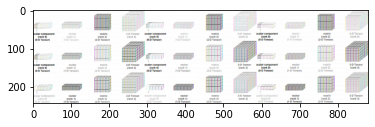

In [20]:
from matplotlib import pyplot as plt

image2 = image.reshape(243, 880, 3)

plt.imshow(image2)
plt.show()

That does not seem to work though: reshape does not change the order of the elements within the memory.

In order to do so, we need to use `permute`, which changes shape **and** the order of the elements.
We need to pass the new order of the dimensions to it.

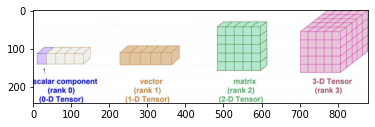

In [21]:
image3 = image.permute(1,2,0) # 1,2,0 --> old dim1 goes first, old dim2 goes second, dim0 goes last
# can also do image.permute(-2,-1,0) -- works with negative indices as well
plt.imshow(image3)
plt.show()

We already saw a case of incompatible `Tensor`s above. Which one is it?

Some more lineal algebra...


In [22]:
z3_norm = z3.norm(2)
pretty_print(z3_norm, "Tensor norm")
pretty_print(np.linalg.norm(y), "ndarray norm") # notice how torch is more OO

Tensor norm
tensor(81.2628)


ndarray norm
2.0670646241212736




Notice how methods reducing `Tensor`s to scalars still return singleton `Tensor`s. (be wary of this feature when scripting something in PT)

To "disentangle" the scalar from a `Tensor` use the `.item()` method.

In [23]:
z3_norm.item()

81.26278686523438

Note that, as for NumPy, PT supports `Tensor`s operator on a subset of its dimensions.

For example, given a `3x4x4 Tensor`, we might want to calculate the norm of each of the three `4x4` matrices composing it. We must hence specify to the `norm` method the dimensions on which we want it to operate the reduction:

In [24]:
z4 = torch.rand((3,4,4))
pretty_print(z4.norm())
pretty_print(z4.norm(dim=(1,2)), "Norm of the three matrices composing z4 -- z4.norm(dim=(1,2))")

tensor(4.3153)


Norm of the three matrices composing z4 -- z4.norm(dim=(1,2))
tensor([2.7641, 2.3086, 2.3775])




As expected, the result is a `1x3 Tensor`, showing the norm of each of the matrices.

We can notice this behaviour in other `Tensor` operator applying a reduction:

In [25]:
print(z4)
print(z4[0,:,0])
print(z4[0,:,0].sum())

tensor([[[0.5448, 0.4005, 0.6352, 0.9357],
         [0.7812, 0.5658, 0.6327, 0.7152],
         [0.3887, 0.9942, 0.9646, 0.0587],
         [0.4592, 0.9384, 0.6622, 0.6771]],

        [[0.9886, 0.1965, 0.3424, 0.7602],
         [0.1854, 0.6530, 0.5681, 0.8302],
         [0.3141, 0.1889, 0.1344, 0.6855],
         [0.9554, 0.7340, 0.2106, 0.1656]],

        [[0.5381, 0.5875, 0.6509, 0.6017],
         [0.1934, 0.8556, 0.1065, 0.2135],
         [0.8166, 0.0409, 0.6457, 0.5349],
         [0.9514, 0.7078, 0.7907, 0.0510]]])
tensor([0.5448, 0.7812, 0.3887, 0.4592])
tensor(2.1739)


In [26]:
pretty_print(z4.sum(dim=0), "z4.sum(dim=0) -- Sum of the three matrices composing the tensor -- is a 4x4 matrix")

pretty_print(z4.prod(dim=1), "z4.prod(dim=1) -- Product of the columns of each matrix composing the tensor")

z4.sum(dim=0) -- Sum of the three matrices composing the tensor -- is a 4x4 matrix
tensor([[2.0715, 1.1845, 1.6284, 2.2976],
        [1.1600, 2.0745, 1.3073, 1.7589],
        [1.5194, 1.2239, 1.7446, 1.2792],
        [2.3660, 2.3802, 1.6636, 0.8936]])


z4.prod(dim=1) -- Product of the columns of each matrix composing the tensor
tensor([[0.0760, 0.2114, 0.2567, 0.0266],
        [0.0550, 0.0178, 0.0055, 0.0716],
        [0.0809, 0.0145, 0.0354, 0.0035]])




In [27]:
pretty_print(z4[0, :, 0], "This is how the first element of z4.prod(dim=1) is obtained. We fix the 1st and 3rd dim to `0` ...")
pretty_print(z4[0, :, 0].prod(), "... and we operate the prod on it")
print("The other elements are obtained by looping through all of the other possible 1st and 3rd dimension indices. For instance, the element `2,3` of the reduction is obtained as\nz4[2, :, 3].prod().\n")
pretty_print(z4[2, : ,3], "z4[2, : ,3]")
pretty_print(z4[2, :, 3].prod(), "z4[2, : ,3].prod()")

This is how the first element of z4.prod(dim=1) is obtained. We fix the 1st and 3rd dim to `0` ...
tensor([0.5448, 0.7812, 0.3887, 0.4592])


... and we operate the prod on it
tensor(0.0760)


The other elements are obtained by looping through all of the other possible 1st and 3rd dimension indices. For instance, the element `2,3` of the reduction is obtained as
z4[2, :, 3].prod().

z4[2, : ,3]
tensor([0.6017, 0.2135, 0.5349, 0.0510])


z4[2, : ,3].prod()
tensor(0.0035)




#### Seamless conversion from NumPy to PT

In [28]:
y_torch = torch.from_numpy(y)
pretty_print(y_torch, "y converted to torch.Tensor")

x_numpy = x.numpy()
pretty_print(x_numpy, "x converted to numpy.ndarray")

# Note that NumPy implicitly converts Tensor to ndarray whenever it can; the same doesn't happen for PT
pretty_print(np.linalg.norm(x), "Example of implicit conversion Tensor → ndarray")

# torch.norm(x_numpy) # ERROR: numpy.... has no attribute dim

y converted to torch.Tensor
tensor([[[0.3499, 0.3660, 0.5054],
         [0.5657, 0.0184, 0.1881],
         [0.0266, 0.4519, 0.0909]],

        [[0.0795, 0.7840, 0.0697],
         [0.0346, 0.6963, 0.3726],
         [0.9762, 0.9513, 0.2886]]], dtype=torch.float64)


x converted to numpy.ndarray
[[[0.9280394  0.1339671  0.958135  ]
  [0.502702   0.04768664 0.20493782]
  [0.5472957  0.40345943 0.7572888 ]]

 [[0.3743773  0.42664456 0.2841804 ]
  [0.11875057 0.21527767 0.7267378 ]
  [0.9204928  0.81843925 0.74477917]]]


Example of implicit conversion Tensor → ndarray
2.4886522




#### Stochastic functionalities

We can render the (pseudo)random number generator deterministic by calling `torch.manual_seed(integer)`.

This works for both CPU and CUDA RNG calls.

In [29]:
torch.manual_seed(123456)
print("...from now on our random tensor should be the same...")

...from now on our random tensor should be the same...


In [30]:
pretty_print(torch.randperm(10), "(randperm) Random permutation of 0:10")

pretty_print(torch.rand_like(z1), "(rand_like) Create random vector with the same shape of z_1")

pretty_print(torch.randint(10, (3, 3)), "(randint) Like rand, but with integers up to 10")

pretty_print(torch.normal(0, 1, (3, 3)), "(normal) Sampling a 3x3 iid scalars from N(0,1)")

pretty_print(torch.normal(torch.Tensor([[1,2,3],[4,5,6],[0,0,0]]), torch.Tensor([[1,0.5,0.9],[0.5,1,0.1],[3,4,1]])), "Sampling from 9 normals with different means and std into a (3x3) Tensor")

(randperm) Random permutation of 0:10
tensor([5, 2, 4, 9, 1, 7, 3, 6, 0, 8])


(rand_like) Create random vector with the same shape of z_1
tensor([[0.4954, 0.0728, 0.9644, 0.5524, 0.0060],
        [0.1053, 0.2431, 0.5141, 0.2926, 0.0147],
        [0.3049, 0.4911, 0.6739, 0.6872, 0.9038],
        [0.1368, 0.2698, 0.1289, 0.3020, 0.0194]])


(randint) Like rand, but with integers up to 10
tensor([[7, 6, 2],
        [9, 0, 3],
        [0, 4, 4]])


(normal) Sampling a 3x3 iid scalars from N(0,1)
tensor([[-0.4107, -1.5861, -0.4778],
        [ 1.0268,  1.2428,  0.4147],
        [-0.6491,  0.0784, -0.7173]])


Sampling from 9 normals with different means and std into a (3x3) Tensor
tensor([[ 1.1070,  1.9439,  2.3757],
        [ 3.6595,  5.8618,  5.9344],
        [ 5.0647, -1.0821, -0.0713]])




### Using GPUs

All `Torch.Tensor` methods support GPU computation via built-in CUDA wrappers.

Just transfer the involved `Tensor`s to CUDA and let the magic happen :)

In [31]:
# check if cuda is available on this machine
torch.cuda.is_available()

has_cuda_gpu = torch.cuda.is_available()

/home/angela/Documenti/Deep Learning/DSSC_DL_2021/venv/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [32]:
if has_cuda_gpu:
    dim = 10000
    large_cpu_matrix = torch.rand((dim, dim)) 
    large_gpu_matrix = large_cpu_matrix.to("cuda") # Can also specify "cuda:gpu_id" if multiple GPUs: cuda:0, cuda:1, etc.
    # alternatively, you may also call large_cpu_matrix.cuda() or large_cpu_matrix.cuda(0)
else:
    print("Sorry, this part of the notebook is inaccessible since it seems you don't have a CUDA-capable GPU on your device :/")

Sorry, this part of the notebook is inaccessible since it seems you don't have a CUDA-capable GPU on your device :/


In [ ]:
pretty_print(large_cpu_matrix.device, "Device of large_cpu_matrix")
pretty_print(large_gpu_matrix.device, "Device of large_gpu_matrix")
pretty_print(large_gpu_matrix, "If a tensor is not on CPU, the device will also be printed if you print the tensor itself")

In [ ]:
if has_cuda_gpu:
    import timeit

    # NOTE: please fix this number w.r.t. your GPU and CPU
    repetitions = 100

    print("Norm of large cpu matrix. Time:", timeit.timeit("large_cpu_matrix.norm()", number=repetitions, globals=locals()))
    print("Norm of large gpu matrix. Time:", timeit.timeit("large_gpu_matrix.norm()", number=repetitions, globals=locals()))
else:
    print("Sorry, this part of the notebook is inaccessible since it seems you don't have a CUDA-capable GPU on your device :/")

Captain obvious: Use `tensor.cpu()` or `tensor.to("cpu")` to move a tensor to your CPU

### Building easy ML models

By using all the pieces we've seen till now, we can build our first ML model using PyTorch: a linear regressor, whose model is

`y = XW + b`

which can also be simplified as

`y = XW`

if we incorporate the bias `b` inside `W` and add to the `X` a column of ones to the right.

We'll first create our data. The `X`s are the 0:9 range plus some iid random noise, while the `y` is just the 0:9 range

In [34]:
x1 = torch.range(0, 9).unsqueeze(-1)
x2 = torch.range(0, 9).unsqueeze(-1)
x3 = torch.range(0, 9).unsqueeze(-1)
x0 = torch.ones([10]).unsqueeze(-1)
X = torch.cat((x1, x2, x3), dim=1)
eps = torch.normal(0, .3, (10, 3))
X += eps
X = torch.cat((X, x0), dim=1) # to concatenate tensors

y = torch.range(0, 9).unsqueeze(-1)


pretty_print(X, "X (covariates)")
pretty_print(y, "y (response)")

X (covariates)
tensor([[ 0.0698, -0.0294, -0.0875,  1.0000],
        [ 1.1936,  0.9067,  1.4257,  1.0000],
        [ 2.0887,  2.0520,  2.0334,  1.0000],
        [ 3.0333,  2.7806,  2.8838,  1.0000],
        [ 4.2332,  3.8806,  3.9750,  1.0000],
        [ 4.9830,  4.9553,  5.3448,  1.0000],
        [ 5.6296,  6.3334,  6.0269,  1.0000],
        [ 7.1786,  6.7816,  7.2288,  1.0000],
        [ 7.7853,  7.9722,  7.8963,  1.0000],
        [ 8.5020,  9.2573,  8.9184,  1.0000]])


y (response)
tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])




/home/angela/Documenti/Deep Learning/DSSC_DL_2021/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """Entry point for launching an IPython kernel.
/home/angela/Documenti/Deep Learning/DSSC_DL_2021/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  
/home/angela/Documenti/Deep Learning/DSSC_DL_2021/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [sta

For the case of linear regression, we usually wish to obtain a set of weights minimizing the so called mean square error/loss (MSE), which is the squared difference between the ground truth and the model prediction, summed for each data instance.

We know that the OLS/Max Likelihood esitmator is the one yielding the optimal set of weights in that regard.

In [35]:
W_hat = ((X.T @ X).inverse()) @ X.T @ y # OLS estimator

pretty_print(W_hat, "W (weights - coefficients and bias/intercept)")

W (weights - coefficients and bias/intercept)
tensor([[ 0.5034],
        [ 0.5444],
        [-0.0323],
        [-0.0463]])




We can evaluate our model on the mean square loss

In [36]:
def mean_square_loss(y, y_hat):
    return (((y - y_hat).norm())**2).item() / y.shape[0]

Let's apply it to our data.

First we need to obtain the predictions, then we can evaluate the MSE.

In [37]:
y_hat = X @ W_hat
pretty_print(y_hat, "Predictions (y_hat)")

pretty_print(mean_square_loss(y, y_hat), "Loss (MSE)")

Predictions (y_hat)
tensor([[-0.0243],
        [ 1.0021],
        [ 2.0565],
        [ 2.9012],
        [ 4.0688],
        [ 4.9870],
        [ 6.0407],
        [ 7.0256],
        [ 7.9576],
        [ 8.9849]])


Loss (MSE)
0.0022791530936956406




#### Using PT built-ins

We will now be exploring the second chunk of PT functionalities, namely the built-in structures and routines supporting the creation of ML models.

We can create the same model we have seen before using PT built-in structures, so we start to see them right away.

Usually, a PT model is a `class` inheriting from `torch.nn.Module`. Inside this class, we'll define two methods:
* the constructor (`__init__`) in which we define the building blocks of our model as class variables (later during our lectures we'll see more "elegant" methods to build models architectures)
* the `forward` method, which specifies as the data fed into the model needs to be processed in order to produce the output

Note for those who already know something about NNs: we don't need to define `backward` methods since we're constructing our model with built-in PT building blocks. PT automatically creates a `backward` routine based upon the `forward` method.

Our model only has one building block (layer) which is a `Linear` layer.
We need to specify the size of the input (i.e. the coefficients `W` of our linear regressor) and the size of the output (i.e. how many scalars it produces) of the layer. We additionaly request our layer to has a bias term `b` (which acts as the intercept of the line we saw before).

The `Linear` layer processes its input as `XW + b`, which is exactly the (first) equation of the linear regressor we saw before.



In [38]:
class LinearRegressor(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.regressor = torch.nn.Linear(in_features=3, out_features=1, bias=True)

    def forward(self, X):
        return self.regressor(X)

We can create an instance of our model and inspect the current parameters by using the `state_dict` method, which prints the building blocks of our model and their current parameters. Note that `state_dict` is essentially a dictonary indexed by the names of the building blocks which we defined inside the constructor (plus some additional identifiers if a layer has more than one set of parameters).

In [39]:
lin_reg = LinearRegressor()

for param_name, param in lin_reg.state_dict().items():
    print(param_name, param)

regressor.weight tensor([[0.0326, 0.2675, 0.2290]])
regressor.bias tensor([-0.3914])


We can update the parameters via `state_dict` and re-using the same OLS estimates we obtained before.

Note that PT is thought of for Deep Learning: it does not have (I think) the routines to solve different ML problems.

Next time, we'll see as we can unleash PT's gradient-based iterative training routines and compare the results w.r.t. the OLS estimators.

In [40]:
state_dict = lin_reg.state_dict()
state_dict["regressor.weight"] = W_hat[:3].T
state_dict["regressor.bias"] = W_hat[3]
lin_reg.load_state_dict(state_dict)

<All keys matched successfully>

In [41]:
# Check if it worked
for param_name, param in lin_reg.state_dict().items():
    print(param_name, param)

regressor.weight tensor([[ 0.5034,  0.5444, -0.0323]])
regressor.bias tensor([-0.0463])


The `forward` method gets implicitly called by passing the data to our model's instance `lin_reg`:

In [42]:
X_lin_reg = X[:,:3]
predictions_lin_reg = lin_reg(X_lin_reg)
pretty_print(predictions_lin_reg, "Predictions of torch class")

Predictions of torch class
tensor([[-0.0243],
        [ 1.0021],
        [ 2.0565],
        [ 2.9012],
        [ 4.0688],
        [ 4.9870],
        [ 6.0407],
        [ 7.0256],
        [ 7.9576],
        [ 8.9849]], grad_fn=<AddmmBackward>)




The predictions are the same as before

In [43]:
pretty_print(y_hat, "Predictions of linear model")

Predictions of linear model
tensor([[-0.0243],
        [ 1.0021],
        [ 2.0565],
        [ 2.9012],
        [ 4.0688],
        [ 4.9870],
        [ 6.0407],
        [ 7.0256],
        [ 7.9576],
        [ 8.9849]])




### Adding non-linearity

One of the staples of DL is that the relationship between the `X`s and the predictions is **non-linear**.

The non-linearity is obtain by applying a non-linear function (called *activation function*) after each linear layer.

We can complicate just a little bit our linear model to create a **logistic regressor**:

`y = logistic(XW + b)`,

where `logistic(z) = exp(z) / (1 + exp(z))`

The logistic function has different names:
* in statistics, it's usually called *inverse logit* as well
* in DL and mathematics, it's called *sigmoid function* due to its "S" shape

Hystorically, the sigmoid was between the first activation functions used in NNs.

![](img/sigmoid.png)

Logistic regression is usually used as a **binary classification model** instead of a regression model.
In this setting, we suppose we have two destination classes to which we assign values 0 and 1: `y ∈ {0, 1}`.
Since the codomain of the sigmoid is `[0,1]`, we can interpret its output `ŷ` as a probability value, and assign each data to the class 0 if `ŷ <= 0.5`, to the class 1 otherwise.


In [44]:
y = torch.Tensor([0,1,0,0,1,1,1,0,1,1])
pretty_print(y, "y for our classification problem")

y for our classification problem
tensor([0., 1., 0., 0., 1., 1., 1., 0., 1., 1.])




Note that we may also want our y to be a vector of `int`s.
We can convert the `Tensor` type to `int` by calling the method `.long()` or `.int()` of `Tensor`.

As in NumPy, the type of the `Tensor` is found within the `dtype` variable of the given `Tensor`.

In [45]:
y = y.long() # ...PT expects a long(=int64)
pretty_print(y, "y converted to int")
pretty_print(y.dtype, "Data type of y")

y converted to int
tensor([0, 1, 0, 0, 1, 1, 1, 0, 1, 1])


Data type of y
torch.int64




Let us now build our logistic regressor in PT.

We only need one single addition wrt the linear regressor: in the `forward` method, we'll add the sigmoidal non-linearity by calling the `sigmoid` function within the `torch.nn.functional` library.

Note that there also exist some "mirror" alias of these functionals within `torch.nn` (e.g. `torch.nn.Sigmoid`): we'll learn in the following lecture why these aliases are there and how to use them.

In [46]:
class LogisticRegressor(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # no difference wrt linear regressor
        self.regressor = torch.nn.Linear(in_features=3, out_features=1)
    
    def forward(self, X):
        out = self.regressor(X)
        # here we apply the sigmoid fct to the output of regressor
        out = torch.nn.functional.sigmoid(out)
        return out

We can instantiate our logistic regressor and use it to calculate our predictions on the same X as before.

Note that **we're using the initial (random) weights which PT has assigned to the model parameters**.
For our linear regressor, we were able to analytically obtain the OLS value of the parameters.
In the case of logistic regression, there's no MaxLikelihood estimator obtainable in close form and we need to resort to numerical methods to obtain them.
Since the part concerning numerical optimization will be discussed during the next Lab, we will not be training our model (hence results will obviously be sub-par).

In [47]:
log_reg = LogisticRegressor()
y_hat = log_reg(X_lin_reg)
pretty_print(y_hat, "logistic regressor predictions")

logistic regressor predictions
tensor([[0.5320],
        [0.4851],
        [0.5382],
        [0.5322],
        [0.5392],
        [0.5152],
        [0.5800],
        [0.5216],
        [0.5709],
        [0.5966]], grad_fn=<SigmoidBackward>)




/home/angela/Documenti/Deep Learning/DSSC_DL_2021/venv/lib/python3.6/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


There exist many ways to evaluate the performance of the logistic regressor: one of them is **accuracy** (correctly identified units / total number of units).
We can define a function to evaluate accuracy and calculate it on our model and data

In [48]:
def accuracy(y, y_hat):
    # Assign each y_hat to its predicted class
    pred_classes = torch.where(y_hat < .5, 0, 1).squeeze().long()
    correct = (pred_classes == y).sum()
    return (correct / y.shape[0]).item()

In [49]:
accuracy(y, y_hat)

0.5

#### Visualizing linear and logistic regression as a computational graph

We now need to convert the equation of the linear and the logistic regression:
* `y = σ(WX + b)`

where `σ` is a generic `ℝ → ℝ` function: sigmoid for logistic regression, identity for linear regression.

![](img/log_reg_graph.jpg)

We organize the input in *nodes* (on the left part) s.t. each node represents one dimension/covariate.
For each data instance, we substitute to each node the corresponding numeric value.
The nodes undergo one or more operations, namely, from left to right:

1. Each node is multiplied by its corresponding weight (a value placed on the edge indicates that the node is multiplied by said value)
2. All the corresponding outputs are summed together

These two operations identify the dot product between vectors `X` and `W`

3. The bias term `b` is added
4. The non-linear function `σ` is applied to the result of this sum
5. Finally, we assign that value to the variable `ŷ`, which is also indicated as a node


### Our first MultiLayer Perceptron (MLP)

The MLP is a family of Artificial NNs in which the input is a vector of size `ℝ^d` and the output is again a vector of size `ℝ^p`, where `p` is determined upon the nature of the problem we wish to solve. Additionally, a MLP is characterized by multiple stages (*layers*) of sequential vector-matrix multiplication and non-linearity (steps 1., 2., 3. above) in which each output of the layer `l-1` acts as input to the layer `l`.

Taking inspiration to the graph of the logistic regression, we can translate all into an image to give sense to these words:

![](img/mlp_graph.jpg)

In NNs, each of the nodes within the graph is called a **neuron**

Neurons are organized in **layers**

In computational graphs, layers are shown from left to right (or bottom to top sometimes), which is the direction of the flow of information inside the NN.

The first layer is called **input layer** and represents the dimensions of our data.

The last layer is called **output layer** and represent the output of our NN.

All the intermediate layers are called **hidden layers**. To be defined MLP, there must be at least one hidden layer inside our model.

If the NN is an MLP, each neuron in a given layer (except for the input) receives information from every neuron of the previous; moreover, each neuron in any layer (except for the output) sends information to every neuron of the next layer. There's no communication between neurons of the same layer (if it happens, we have a **Recursive Neural Network**).

For the sake of brevity, usually in NN computational graphs we drop the blocks `+` and `σ`, the values of weights, and the reference to the bias terms, remaining with a scheme conveying info about
* the number of neurons per layer
* the connectivity of neurons

The graph above becomes:

![](img/mlp_graph_common.jpg)

We can then start programming our simple MLP in PT.

We will suppose that our MLP is for **binary classification**, hence the activation function `τ` is the sigmoid.

**Q**: what if we wanted our MLP to operate a regression?

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(in_features=3, out_features=2)
        self.layer2 = torch.nn.Linear(in_features=2, out_features=1)

    def forward(self, X):
        out = self.layer1(X)
        out = torch.nn.functional.relu(out)
        out = self.layer2(X)
        out = torch.nn.functional.sigmoid(out)
        return out


For the great majority of MLP, it's very hard to get analytical solutions to our sets of weights and biases. We then resort to numerical methods for optimization.

In DL, we normally used gradient-based methods like Stochastic Gradient Descent with *backpropagation* to find approximate solutions.

We'll cover these topics in future lectures. For now, the focus is to build a MLP in PT and perform the *forward pass* (=evaluate the model on a set of data).

We can analyse the structure of our MLP by just printing the model

In [ ]:
model = MLP()
model

although we might wanna have additional informations.

There's an additional package, called `torch-summary` which helps us producing more informative and exhaustive model summaries.

In [ ]:
import sys
!{sys.executable} -m pip install torch-summary
from torchsummary import summary

In [ ]:
summary(model)

Let us suppose we wish to build a larger model from the graph below.

![](img/mlp_graph_larger.jpg)

We suppose that

1. The layers have no bias units
2. The activation function for hidden layers is `ReLU`

Moreover, we suppose that this is a classification problem.

As you might recall, when the number of classes is > 2, we encode the problem in such a way that the output layer has a no. of neurons corresponding to the no. of classes. Doing so, we establish a correspondence between output units and classes. The value of the $j$-th neuron represents the **confidence** of the network in assigning a given data instance to the $j$-th class.

Classically, when the network is encoded in such way, the activation function for the final layer is the **softmax** function.
If $C$ is the total number of classes,

$softmax(z_j) = \frac{\exp(z_j)}{\sum_{k=1}^C \exp(z_k)}$

where $j\in \{1,\cdots,C\}$ is one of the classes.

If we repeat this calculation for all $j$s, we end up with $C$ normalized values (i.e., between 0 and 1) which can be interpreted as probability that the network assigns the instance to the corresponding class.

In [ ]:
# Task: build this network from scratch during class

In [ ]:
# instantiate and summarise